In [ ]:
!git clone "https://github.com/AhmadYahya97/Emotion-Recognition-From-Facial-Expressions.git"

fatal: destination path 'Emotion-Recognition-From-Facial-Expressions' already exists and is not an empty directory.


In [ ]:
#loading ML packages 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
import pandas as pd
  
# read an excel file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_excel("LandMarkData.xlsx"))
  
# show the dataframe
df.head()

,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,Emotion
0,98,111,130,154,173,186,202,223,246,177,190,204,218,210,220,232,239,245,126,129,141,159,150,139,201,205,218,234,228,215,220,226,235,247,253,267,284,279,272,264,254,238,224,241,252,260,279,259,251,240,ANGRY
1,100,111,127,147,165,180,193,213,235,171,185,198,212,211,221,231,237,242,132,134,144,161,153,143,198,200,211,226,220,209,227,234,241,251,256,269,284,280,272,265,256,243,230,246,255,261,279,263,256,247,ANGRY
2,97,113,133,158,181,189,200,217,237,180,195,209,224,220,228,237,242,247,125,130,142,159,150,138,203,204,216,231,226,216,221,228,238,249,256,271,287,285,278,271,261,242,226,247,258,265,284,267,259,249,ANGRY
3,91,108,127,151,174,185,199,217,239,175,190,205,220,220,229,238,245,250,119,123,136,156,146,133,202,206,220,236,230,217,231,237,246,257,262,277,297,289,280,272,263,249,236,253,262,269,292,268,262,252,ANGRY
4,98,112,132,152,167,175,186,200,222,171,185,198,212,212,221,231,238,244,127,132,142,159,151,141,196,197,209,222,220,209,232,239,245,255,259,272,289,285,279,272,265,252,238,253,261,266,285,266,261,253,ANGRY


In [ ]:
df.shape

(250, 51)

In [ ]:
df['combined'] = df.apply(lambda df: list([df[18], df[19], df[20], df[21], df[22], df[23], df[24],
                                           df[25], df[26], df[27], df[28], df[29], df[30], df[31],
                                           df[32], df[33], df[34], df[35], df[36], df[37], df[38],
                                           df[39], df[40], df[41], df[42], df[43], df[44], df[45],
                                           df[46], df[47], df[48], df[49], df[50], df[51], df[52],
                                           df[53], df[54], df[55], df[56], df[57], df[58], df[59], 
                                           df[60], df[61], df[62], df[63], df[64], df[65], df[66],
                                           df[67]
                                          ]),axis=1)  

In [ ]:
df['combined']

0      [98, 111, 130, 154, 173, 186, 202, 223, 246, 1...
1      [100, 111, 127, 147, 165, 180, 193, 213, 235, ...
2      [97, 113, 133, 158, 181, 189, 200, 217, 237, 1...
3      [91, 108, 127, 151, 174, 185, 199, 217, 239, 1...
4      [98, 112, 132, 152, 167, 175, 186, 200, 222, 1...
                             ...                        
245    [97, 109, 125, 147, 167, 182, 200, 222, 245, 1...
246    [97, 107, 123, 144, 166, 181, 200, 225, 249, 1...
247    [102, 112, 129, 151, 169, 179, 196, 218, 239, ...
248    [103, 114, 131, 150, 169, 180, 195, 213, 234, ...
249    [92, 100, 113, 131, 156, 161, 173, 190, 209, 1...
Name: combined, Length: 250, dtype: object

In [ ]:
df.drop(columns=[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67],inplace=True)

In [ ]:
df.head()

,Emotion,combined
0,ANGRY,"[98, 111, 130, 154, 173, 186, 202, 223, 246, 1..."
1,ANGRY,"[100, 111, 127, 147, 165, 180, 193, 213, 235, ..."
2,ANGRY,"[97, 113, 133, 158, 181, 189, 200, 217, 237, 1..."
3,ANGRY,"[91, 108, 127, 151, 174, 185, 199, 217, 239, 1..."
4,ANGRY,"[98, 112, 132, 152, 167, 175, 186, 200, 222, 1..."


In [ ]:
df['Emotion'].value_counts()

SURPRISE    83
HAPPY       69
ANGRY       45
SAD         28
FEAR        25
Name: Emotion, dtype: int64

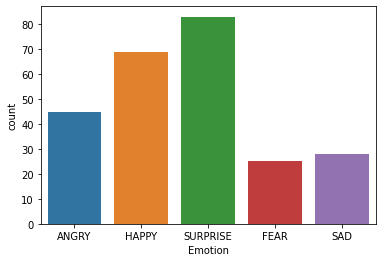

In [ ]:
sns.countplot(x='Emotion',data=df)

In [ ]:
df.to_csv('final_data.csv',index=False)

In [ ]:
#seperating the features and labels
Xfeatures=df['combined']
ylabels=df['Emotion']

In [ ]:
Xfeatures

0      [98, 111, 130, 154, 173, 186, 202, 223, 246, 1...
1      [100, 111, 127, 147, 165, 180, 193, 213, 235, ...
2      [97, 113, 133, 158, 181, 189, 200, 217, 237, 1...
3      [91, 108, 127, 151, 174, 185, 199, 217, 239, 1...
4      [98, 112, 132, 152, 167, 175, 186, 200, 222, 1...
                             ...                        
245    [97, 109, 125, 147, 167, 182, 200, 222, 245, 1...
246    [97, 107, 123, 144, 166, 181, 200, 225, 249, 1...
247    [102, 112, 129, 151, 169, 179, 196, 218, 239, ...
248    [103, 114, 131, 150, 169, 180, 195, 213, 234, ...
249    [92, 100, 113, 131, 156, 161, 173, 190, 209, 1...
Name: combined, Length: 250, dtype: object

In [ ]:
import numpy as np
X = []
for i in range(0, 250):
  X.append(Xfeatures[i])
# converting list to array
Xdata = np.array(X)
Xdata

array([[ 98, 111, 130, ..., 259, 251, 240],
       [100, 111, 127, ..., 263, 256, 247],
       [ 97, 113, 133, ..., 267, 259, 249],
       ...,
       [102, 112, 129, ..., 256, 250, 242],
       [103, 114, 131, ..., 260, 251, 240],
       [ 92, 100, 113, ..., 263, 257, 249]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xdata,ylabels,test_size=0.25,random_state=42)
# svc = SVC(kernel='linear',probability=True)
# svc.fit(X_train, y_train)
# svc.predict(X_test)
# svc.predict_proba(X_test)

In [ ]:
#Building the pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# Linear SVM Pipeline
pipeline=Pipeline(steps=[('svm',SVC(kernel='linear', probability=True))])
# pipeline=Pipeline(steps=[('svm',SVC(kernel='sigmoid', probability=True))])
# pipeline=Pipeline(steps=[('svm',SVC(kernel='poly', probability=True))])
# pipeline=Pipeline(steps=[('svm',SVC(kernel='rbf', probability=True))])

In [ ]:
# Train and Fit Data 
pipeline.fit(X_train,y_train)

Pipeline(steps=[('svm', SVC(kernel='linear', probability=True))])

In [ ]:
# Check Accuracy 
pipeline.score(X_test,y_test)

0.9206349206349206

In [ ]:
pred = pipeline.predict_proba(X_test)

In [ ]:
pipeline.classes_

array(['ANGRY', 'FEAR', 'HAPPY', 'SAD', 'SURPRISE'], dtype=object)

In [ ]:
#Saving the model and Pipeline
import joblib
pipeline_file=open("FaceExpressionPredector.pkl",'wb')
joblib.dump(pipeline,pipeline_file)
pipeline_file.close()

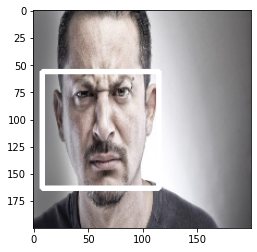

In [ ]:
import cv2 as cv
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt

def detectDlib(imgpath):
  frame = cv.imread(imgpath)
  frame = cv.resize(frame, (200, 200))
  frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

  gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  face_detect = dlib.get_frontal_face_detector()
  rects = face_detect(gray,1)
  for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)

    cv.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)
  plt.imshow(frame)
  plt.show()


detectDlib("/content/Emotion-Recognition-From-Facial-Expressions/testImages/angry.jpg")

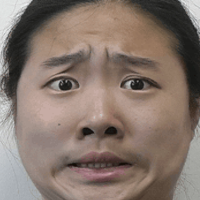

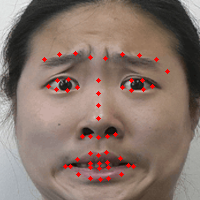

In [ ]:
import cv2 as cv 
import dlib
from google.colab.patches import cv2_imshow # for image display
# cap = cv.imread("/content/Emotion-Recognition-From-Facial-Expressions/SADNESS/image_028.png")
# cap = cv.imread("/content/Emotion-Recognition-From-Facial-Expressions/HAPPY/image_040.png")
# cap = cv.imread("/content/Emotion-Recognition-From-Facial-Expressions/ANGER/image_016.png")
# cap = cv.imread("/content/Emotion-Recognition-From-Facial-Expressions/SURPRISE/image_069.png")
cap = cv.imread("/content/Emotion-Recognition-From-Facial-Expressions/FEAR/image_022.png")
# cap = cv.imread("/content/Emotion-Recognition-From-Facial-Expressions/testImages/happy2.PNG")
# cap = cv.imread("/content/Emotion-Recognition-From-Facial-Expressions/testImages/sad.jpg") # cap = cap[20:160,40:150]
# cap = cv.imread("/content/Emotion-Recognition-From-Facial-Expressions/testImages/angry.jpg") # cap = cap[0:160,10:130]
# cap = cv.resize(cap, (200, 200))
# cap = cap[0:160,10:130]
cv2_imshow(cap)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
gray = cv.cvtColor(cap, cv.COLOR_BGR2GRAY)
faces = detector(gray)
for f in faces:
  x1 = f.left()
  y1 = f.top()
  x2 = f.right()
  y2 = f.bottom()
  # cv.rectangle(cap, (x1, y1), (x2, y2), (0,255,0), 3)
  landmarks = predictor(gray, f)
  d = {'xy':[]}
  for n in range(18,68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    cv.circle(cap, (x, y), 2, (0, 0, 255), -1)
    d['xy'].append(int(x+y))
  # for n in range(0,68):
  #   x = landmarks.part(n).x
  #   y = landmarks.part(n).y
  #   cv.circle(cap, (x, y), 2, (0, 0, 255), -1)
    # print(n, x, y)
cv2_imshow(cap)

In [ ]:
d.values()

dict_values([[103, 113, 128, 147, 163, 176, 194, 215, 238, 178, 191, 203, 216, 218, 226, 235, 243, 249, 134, 137, 147, 164, 157, 145, 209, 211, 222, 238, 232, 221, 231, 236, 243, 253, 258, 278, 299, 295, 286, 279, 268, 252, 236, 253, 262, 269, 293, 275, 267, 257]])

In [ ]:
x = []
for i in d.values():
  x.append(i)
x
pipeline.predict(x)

array(['FEAR'], dtype=object)

In [ ]:
pipeline.predict_proba(x)

array([[0.07258483, 0.49153925, 0.09347353, 0.26058087, 0.0818215 ]])

In [ ]:
pipeline.classes_

array(['ANGRY', 'FEAR', 'HAPPY', 'SAD', 'SURPRISE'], dtype=object)

In [ ]:
!pip install -q streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import altair as alt
import cv2 as cv
from PIL import Image
import numpy as np
import os
import dlib

# Exploratory data analysis Packages
import pandas as pd
import numpy as np
from datetime import datetime
import os

# Utils
import joblib
pipeline = joblib.load(
    open("/content/FaceExpressionPredector.pkl", "rb")
)

@st.cache
def load_image(img):
  im = Image.open(img)
  return im

@st.cache
def image_resize(img, width=None, height=None, inter=cv.INTER_AREA):
  dim = None
  (h, w) = img.shape[:2]
  if width is None and height is None:
    return img
  if width is None:
    r = width/float(w)
    dim = (int(w*r), height)
  else:
    r = width/float(w)
    dim = (width, int(h*r))
  
  #resize the image
  resized = cv.resize(img, dim, interpolation = inter)
  return resized

emotions_emoji_dict = {
    "ANGRY": "😠",
    "FEAR": "😨😱",
    "HAPPY": "🤗",
    "SAD": "😔",
    "SURPRISE": "😮"
}

def main():
  st.title("Face Emotion Recognition App")
  st.text("Build with Streamlit, OpenCV, and dlib")
  activity = ["About","FaceExpressionPredector"]
  choice = st.sidebar.selectbox("Select Activity", activity)
  if choice=="About":
    st.subheader("About")
    st.markdown('In this Application we are using **dlib** for creating Facial LandMarks, and predicting expression. **Streamlit** is to create the Web Graphical User Interfac(GUI)')
  if choice=="FaceExpressionPredector":
    st.subheader("Face Emotion Predictor")
    image_file = st.file_uploader("Upload Image",type=['jpg','png','jpeg'])
    if image_file is not None:
      col1, col2 = st.columns(2)
      with col1:  
        our_image = Image.open(image_file)
        st.subheader("Original Image")
        st.image(our_image)
      with col2:
        st.subheader("LandMarks Image")
        new_img = np.array(our_image.convert('RGB'))
        img = cv.cvtColor(new_img, 1)
        g_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        gray_img = cv.resize(g_img, (200, 200))
        # st.image(gray_img)
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
        faces = detector(gray_img)
        for f in faces:
          landmarks = predictor(gray_img, f)
          d = {'xy':[]}
          for n in range(18, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            # cv.circle(gray_img, (x, y), 2, (255, 255, 255), -1)
            d['xy'].append(int(x+y))
          for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv.circle(gray_img, (x, y), 2, (255, 255, 255), -1)
        st.image(gray_img)
      x = []
      for i in d.values():
        x.append(i)
      # st.write(pipeline.predict(x))
      prediction = " ".join(pipeline.predict(x)) 
      probability = pipeline.predict_proba(x)
      with col1:
        st.subheader("Prediction")
        emoji_icon = emotions_emoji_dict[prediction]
        st.success("{}:{}".format(prediction, emoji_icon))
        st.write("Confidence:{}".format(np.max(probability)))
      with col2:
        st.subheader("Prediction Probability")
        # st.write(probability)
        proba_df = pd.DataFrame(probability, columns=pipeline.classes_)
        # st.write(proba_df.T)
        proba_df_clean = proba_df.T.reset_index()
        proba_df_clean.columns = ["emotions", "probability"]
        fig = (
            alt.Chart(proba_df_clean)
            .mark_bar()
            .encode(x="emotions", y="probability", color="emotions")
        )
        st.altair_chart(fig, use_container_width=True)
        
if __name__ == '__main__':
  main()


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.231.60.231:8501

npx: installed 22 in 3.295s
your url is: https://angry-lionfish-78.loca.lt
